In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load cleaned movie data
df = pd.read_csv('cleaned_movie_data.csv')

In [3]:
# Convert relevant columns to numeric, coercing errors into NaN
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')
df['Budget'] = pd.to_numeric(df['Budget'], errors='coerce')
df['Revenue'] = pd.to_numeric(df['Revenue'], errors='coerce')
df['Ratings'] = pd.to_numeric(df['Ratings'], errors='coerce')
df['Vote Count'] = pd.to_numeric(df['Vote Count'], errors='coerce')
df['Popularity'] = pd.to_numeric(df['Popularity'], errors='coerce')
df['Movie ID'] = pd.to_numeric(df['Movie ID'], errors='coerce')

# Convert the specified columns to integers (removing decimal places)
df['Year'] = df['Year'].astype('Int64')
df['Duration'] = df['Duration'].astype('Int64')
df['Budget'] = df['Budget'].astype('Int64')
df['Revenue'] = df['Revenue'].astype('Int64')
df['Vote Count'] = df['Vote Count'].astype('Int64')
df['Movie ID'] = df['Movie ID'].astype('Int64')

# Convert all object columns to string type (handling NaN as <NA> in string columns)
df['Title'] = df['Title'].astype('string')
df['Director'] = df['Director'].astype('string')
df['Producer'] = df['Producer'].astype('string')
df['Genres'] = df['Genres'].astype('string')
df['Summary'] = df['Summary'].astype('string')
df['Content Rating'] = df['Content Rating'].astype('string')
df['Original Language'] = df['Original Language'].astype('string')
df['Production Companies'] = df['Production Companies'].astype('string')
df['Production Countries'] = df['Production Countries'].astype('string')
df['Spoken Languages'] = df['Spoken Languages'].astype('string')
df['Tagline'] = df['Tagline'].astype('string')

In [4]:
# Descriptive statistics for numeric columns
df.describe()

,Year,Duration,Budget,Revenue,Ratings,Vote Count,Popularity,Movie ID
count,29792.0,29792.0,29792.0,29792.0,29792.000000,29792.0,29792.000000,29792.0
mean,2004.247818,98.6394,8523427.654605,22896770.193072,5.530998,630.935587,12.311139,291491.504095
std,14.987862,19.584829,25282313.624706,96851088.661578,1.910451,1986.554475,41.673989,342862.874939
min,1970.0,60.0,0.0,0.0,0.000000,0.0,0.001000,2.0
25%,1994.0,88.0,0.0,0.0,4.971750,9.0,2.689000,28791.25
50%,2008.0,95.0,0.0,0.0,5.948500,53.0,6.475500,116567.0
75%,2017.0,106.0,3500000.0,2416644.5,6.700000,324.0,12.755000,470415.25
max,2024.0,600.0,460000000.0,2923706026.0,10.000000,36315.0,2691.119000,1363342.0


In [ ]:
# Filter movies with at least 300 votes, slightly under the 75% of vote threshold
df_votecnt_filtered = df[df['Vote Count'] >= 300]

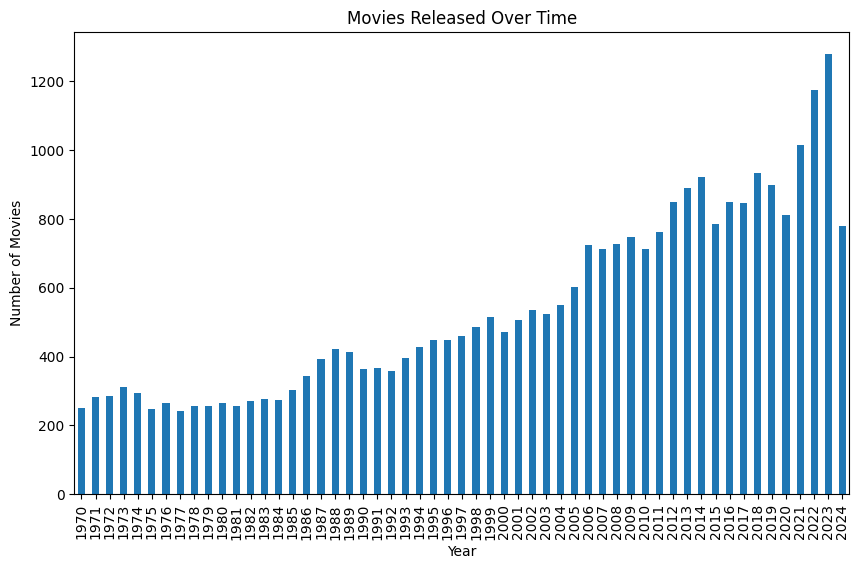

In [5]:
# Movies released by year
movies_per_year = df['Year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10,6))
movies_per_year.plot(kind='bar')
plt.title('Movies Released Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

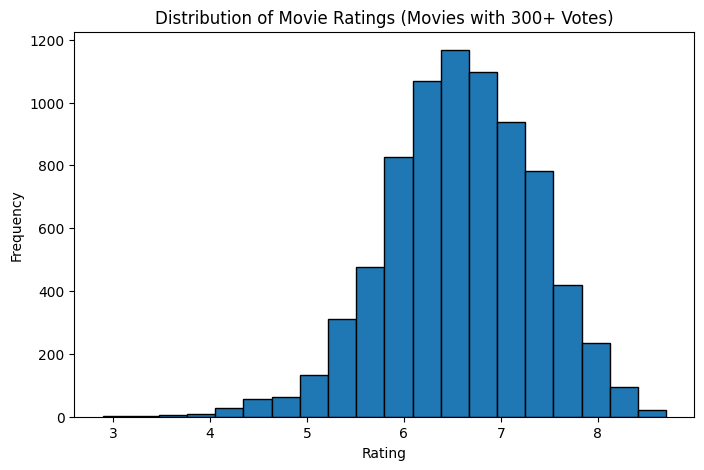

In [18]:
# Plot distribution of ratings for movies with at least 100 votes
plt.figure(figsize=(8,5))
df_votecnt_filtered['Ratings'].plot(kind='hist', bins=20, edgecolor='black')
plt.title('Distribution of Movie Ratings (Movies with 300+ Votes)')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

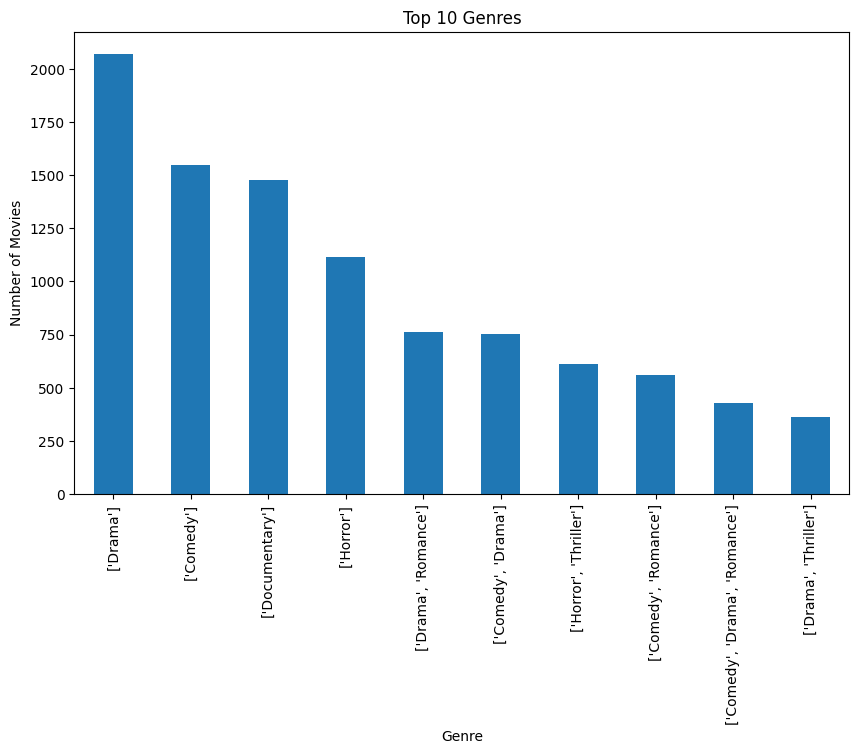

In [7]:
# Flatten the list of genres
all_genres = df['Genres'].explode()

# Top genres
top_genres = all_genres.value_counts().head(10)

# Plot
plt.figure(figsize=(10,6))
top_genres.plot(kind='bar')
plt.title('Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.show()

In [11]:
# Top 10 movies by revenue
top_revenue_movies = df[['Title', 'Year', 'Revenue']].sort_values(by='Revenue', ascending=False).head(10)
print(top_revenue_movies)

                             Title  Year     Revenue
3                           Avatar  2009  2923706026
16               Avengers: Endgame  2019  2799439100
228       Avatar: The Way of Water  2022  2320250281
18                         Titanic  1997  2264162353
59    Star Wars: The Force Awakens  2015  2068223624
6           Avengers: Infinity War  2018  2052415039
52         Spider-Man: No Way Home  2021  1921847111
1169                  Inside Out 2  2024  1682636477
50                  Jurassic World  2015  1671537444
320                  The Lion King  2019  1663000000


In [16]:
# Get the top 10 movies by rating (with at least 300 votes)
top_rated_movies = df_votecnt_filtered[['Title', 'Year', 'Ratings']].sort_values(by='Ratings', ascending=False).head(20)

# Display the top-rated movies
print(top_rated_movies)

                                              Title  Year  Ratings
12                         The Shawshank Redemption  1994    8.706
48                                    The Godfather  1972    8.700
200                           The Godfather Part II  1974    8.575
110                                Schindler's List  1993    8.565
102                                   Spirited Away  2001    8.537
1004                    Dilwale Dulhania Le Jayenge  1995    8.529
2                                   The Dark Knight  2008    8.516
84                                   The Green Mile  1999    8.507
77                                         Parasite  2019    8.507
20    The Lord of the Rings: The Return of the King  2003    8.500
9                                      Pulp Fiction  1994    8.488
246                                      Your Name.  2016    8.487
7213       David Attenborough: A Life on Our Planet  2020    8.481
10                                     Forrest Gump  1994    8